EASY LEVEL

1. How many unique customers are in the dataset?

In [157]:
'''
THOUGHT DUMP

opened the dim_customer.json file
so many numberssss
oh age, then first name, every unique name is distinguished by a number, now there's gender
personal info category doesn't matter; 
as long as the unique numbers are taken, we can see how many unique customers there are
theres a literal id number already, that should count how many unique customers there are easily
last name is just the last name
this doesn't rlly need to be coded if ure able to notice the pattern, but for larger
and dynamic datasets, i see the need for it
update: realized how simple this is xD
'''

"\nTHOUGHT DUMP\n\nopened the dim_customer.json file\nso many numberssss\noh age, then first name, every unique name is distinguished by a number, now there's gender\npersonal info category doesn't matter; \nas long as the unique numbers are taken, we can see how many unique customers there are\ntheres a literal id number already, that should count how many unique customers there are easily\nlast name is just the last name\nthis doesn't rlly need to be coded if ure able to notice the pattern, but for larger\nand dynamic datasets, i see the need for it\nupdate: realized how simple this is xD\n"

In [158]:
#read the customer json file using pandas
import pandas as pd
js = pd.read_json("./dim_customer.json")
#read csv file
cs = pd.read_csv("./fct_invoice.csv")
import numpy as np
import matplotlib.pyplot as plt

Assumption 1: no customers are alike; there are no repeat purchases

In [159]:
#choose a key (i chose id) and get the number of nested keys
total_customers = len(js["id"])
print(f"There is a total number of {total_customers} unique customers.")
#the thought dump i made seemed too simple when i talked about it with my friend xD so there are other assumptions

There is a total number of 5191 unique customers.


Assumption 2: there are a few alike customers by full name; there are repeat purchases done at various times (meaning same person but different age when purchasing)

In [160]:
#combine first name and last name together
first_name = js['first_name']
last_name = js['last_name']
full_name = first_name + ' ' + last_name
#only get the unique values
unique_list = set(full_name)
total_number = len(unique_list)
print(f"There is a total number of {total_number} unique customers.")

There is a total number of 4992 unique customers.


Assumption 3: there are a few alike customers by full name and age

In [161]:
#combine first name, last name, and age together
first_name = js['first_name']
last_name = js['last_name']
cust_age = js['age']
full_name_age = first_name + ' ' + last_name + ',' + str(cust_age)
#only get the unique values
unique_list = set(full_name_age)
total_number_1 = len(unique_list)
print(f"There is a total number of {total_number_1} unique customers.")

There is a total number of 4992 unique customers.


2. What are the different categories of products available? How many unique categories are there?

In [162]:
'''
THOUGHT DUMP

open invoice csv
make category a set -> print set
len(set) sumn like that
'''

'\nTHOUGHT DUMP\n\nopen invoice csv\nmake category a set -> print set\nlen(set) sumn like that\n'

In [163]:
categ_list = cs['category']
unique_categ = set(categ_list) #only input the distinct items
categ_total = len(unique_categ) #count the items
print(f"There are {categ_total} different categories of available products, which are {str(unique_categ)[1: -1]}.")
#[1: -1] to remove the curly brackets

There are 8 different categories of available products, which are 'Technology', 'Shoes', 'Clothing', 'Toys', 'Souvenir', 'Food & Beverage', 'Cosmetics', 'Books'.


3. Which payment method is the most popular? How many times was it used?

In [164]:
'''
THOUGHT DUMP

refer to payment_method in cs
return the method that has the highest count
max?
could there be a numpy function to get that
'''

'\nTHOUGHT DUMP\n\nrefer to payment_method in cs\nreturn the method that has the highest count\nmax?\ncould there be a numpy function to get that\n'

In [165]:
payment_list = cs['payment_method']

#count the number of occurrences of the values
method_count = payment_list.value_counts()

#get the payment method with the highest count
max_method = method_count.index[0]
#index[0] to attain the first value in method_count

#get the number of occurrences of max_method
max_count = payment_list.value_counts()[max_method]

print(f"{max_method} is the most popular payment method, being used {max_count} times.")


Cash is the most popular payment method, being used 44447 times.


MEDIUM LEVEL

1. What are the three most popular categories, by total sales?

In [166]:
'''
THOUGHT DUMP

refer to category, and quantity x price in cs
return the 3 most popular categories
sumn like [3]?
match the category, and quantity x price
sum the price per category
'''

'\nTHOUGHT DUMP\n\nrefer to category, and quantity x price in cs\nreturn the 3 most popular categories\nsumn like [3]?\nmatch the category, and quantity x price\nsum the price per category\n'

In [167]:
#create new column to store each category's total amt of sales
cs["sale"] = cs["quantity"] * cs["price"]

#list the categories according to the total of columns with int or float data
categ_sum = cs.groupby(['category']).sum()

#according to highest sales, list the categories
top_3 = categ_sum["sale"].nlargest(3)

#get only the category names
categ_names = []
for i in range(3):
    categ_names.append(top_3.index[i])

print(f"{str(categ_names)[1:-1]} are the three most popular categories by total sales.")

'Clothing', 'Shoes', 'Technology' are the three most popular categories by total sales.


2. What are the total sales attributed to customers over the age of 45?

In [168]:
'''
THOUGHT DUMP

connect json and csv file
find the age in json file according to customer_id in csv file
group by filter age into to > 45 then sum "sale" column
'''

'\nTHOUGHT DUMP\n\nconnect json and csv file\nfind the age in json file according to customer_id in csv file\ngroup by filter age into to > 45 then sum "sale" column\n'

In [169]:
id_keys = js['id'].tolist()
id_list = cs['customer_id']

#find common IDs
common_ids = set(id_keys) & set(id_list)

#filter js to include only indices with common IDs
filtered_js = js[js['id'].isin(common_ids)]

#group by age and filter for ages > 45
age_grp = filtered_js.groupby('age')['id'].apply(list).to_dict()

#filter groups into ages > 45
filtered_ages = {age: ids for age, ids in age_grp.items() if age > 45}

#get unique IDs from filtered ages
unique_ids = set(id_ for ids in filtered_ages.values() for id_ in ids)

#get total sales
sale_values = cs.loc[id_list.isin(unique_ids), 'sale'].sum()

print(f"Customers over the age of 45 had a total of {sale_values} in sales.")
    

Customers over the age of 45 had a total of 82039768.15 in sales.


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [170]:
'''
THOUGHT DUMP

i am still getting familiar with graphs
i will google everything for this
oh i will import matplotlib
'''

'\nTHOUGHT DUMP\n\ni am still getting familiar with graphs\ni will google everything for this\noh i will import matplotlib\n'

C:\Users\Dell\AppData\Local\Temp\ipykernel_19132\2083368840.py:5: UserWarning: Parsing '16/05/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  datecs['invoice_date'] = pd.to_datetime(datecs['invoice_date'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_19132\2083368840.py:5: UserWarning: Parsing '24/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  datecs['invoice_date'] = pd.to_datetime(datecs['invoice_date'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_19132\2083368840.py:5: UserWarning: Parsing '24/05/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  datecs['invoice_date'] = pd.to_datetime(datecs['invoice_date'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_19132\2083368840.py:5: UserWarning: Parsing '13/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  date

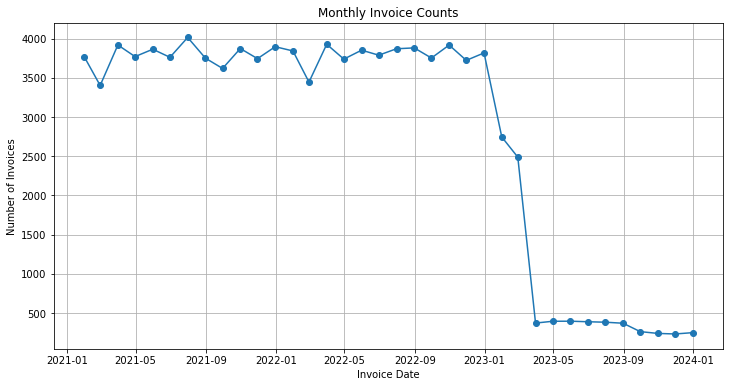

In [171]:
#dupe the original cs
datecs=cs.copy()

#ensure invoice_date column elements are in datetime format
datecs['invoice_date'] = pd.to_datetime(datecs['invoice_date'])

#set the invoice date column as the index of the cs file
datecs.set_index('invoice_date', inplace=True)

#base the data by month and count the number of invoices each month
monthly_counts = datecs.resample('M').size()

#Plot the monthly invoice counts
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts, marker='o', linestyle='-')
plt.title('Monthly Invoice Counts')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.show()

The graph appears to have a steady number of invoices from 2021-01 until 2022-12. It goes to a steep decline in 2023-01 and becomes stagnant just before 2023-05.

HARD LEVEL

In [172]:
'''
THOUGT DUMP

crazyyy
'''

'\nTHOUGT DUMP\n\ncrazyyy\n'

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth)

In [173]:
#create new column for the wanted dimensions
#SHOULD group ages into ranges (e.g., 20-29)
js['decade_age_range'] = (js['age'] // 10 * 10).astype('Int64').astype(str) + '-' + ((js['age'] // 10 * 10) + 9).astype('Int64').astype(str)

#merge the files on customer_id
merged_data = cs.merge(js, left_on='customer_id', right_index=True)
#combine sales data with customer info

#create pivot table; show sales breakdown by category and decade age range
pivot_table = pd.pivot_table(merged_data, values='price', index=['category', 'decade_age_range'], aggfunc=np.sum)
#sum is to get total sales for each category and age range

print(pivot_table)

                               price
category decade_age_range           
Books    10-19               3454.20
         20-29              21043.35
         30-39              22876.50
         40-49              23088.60
         50-59              20634.30
...                              ...
Toys     50-59              93757.44
         60-69             100280.32
         70-79              73687.04
         80-89              42577.92
         <NA>-<NA>         430151.68

[72 rows x 1 columns]
